# Assignment 1: Association Rule Mining

#### Name: FAN CHIN WEI
#### Student ID: MCS221024
#### Subject: MCSD2123 MASSIVE DATA MINING AND STREAMING

## Part 1: Exploratory Data Analysis (EDA)

#### EDA is used to analyze and summarize dataset before applying associate rule mining.

In [153]:
# Import libraries

import pandas as pd
import numpy as np

In [163]:
# Read the dataset and save the data in dataframe

data = pd.read_csv("Dataset_B.csv")
store_sales = pd.DataFrame(data)

# Print first 5 rows of data
store_sales.head()

Member_number        Date   itemDescription
0           3562  18-03-2015       salty snack
1           3145  16-11-2015          cake bar
2           3595  17-12-2015        whole milk
3           4934  17-03-2015  other vegetables
4           3386    3/2/2015            yogurt

In [21]:
# Display data type for each column

store_sales.dtypes

Member_number       int64
Date               object
itemDescription    object
dtype: object

#### Member_number shows it is an integer data type meanwhile Date and itemDescription are object data type.

In [22]:
# Display dimension of store_sales

store_sales.shape

(19415, 3)

#### This dataset consists of 19415 rows of data and 3 columns of data.

In [23]:
# Display the summary of statistic of the dataset

store_sales.describe()

Member_number
count   19415.000000
mean     3005.468143
std      1156.588887
min      1000.000000
25%      1998.000000
50%      3010.000000
75%      4015.000000
max      5000.000000

In [24]:
# Display out the dataset information

store_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19415 entries, 0 to 19414
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    19415 non-null  int64 
 1   Date             19415 non-null  object
 2   itemDescription  19415 non-null  object
dtypes: int64(1), object(2)
memory usage: 455.2+ KB


In [25]:
# Check null values in the dataset

store_sales.isnull().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

#### According to the result, there are not have null values in this dataset.

In [26]:
# Print unique elements of the items

store_sales.itemDescription.unique()

array(['salty snack', 'cake bar', 'whole milk', 'other vegetables',
       'yogurt', 'roll products ', 'dessert', 'snack products', 'candy',
       'coffee', 'grapes', 'rolls/buns', 'citrus fruit', 'nuts/prunes',
       'soft cheese', 'frozen vegetables', 'cat food', 'pip fruit',
       'margarine', 'UHT-milk', 'specialty chocolate', 'onions',
       'tropical fruit', 'dental care', 'semi-finished bread',
       'frozen meals', 'ice cream', 'herbs', 'rum', 'soda', 'mayonnaise',
       'tea', 'butter milk', 'bottled water', 'specialty bar', 'butter',
       'tidbits', 'brown bread', 'pot plants', 'shopping bags',
       'cream cheese ', 'spread cheese', 'berries', 'root vegetables',
       'canned beer', 'oil', 'pastry', 'meat', 'bottled beer',
       'misc. beverages', 'white bread', 'liquor (appetizer)', 'pet care',
       'waffles', 'white wine', 'beverages', 'napkins', 'vinegar',
       'cling film/bags', 'sliced cheese', 'pork', 'hamburger meat',
       'dishes', 'whipped/sour crea

In [27]:
# Print the total of unique items

len(store_sales.itemDescription.unique())

164

#### Based on result, there are 164 items in this dataset.

In [28]:
# Print the total of member number

len(store_sales.Member_number.unique())

3814

#### Based on result, there are 3814 member number in this dataset.

In [29]:
# Print out the total of each items in itemsDescription column

items_sales = store_sales["itemDescription"].value_counts()
items_sales

whole milk               957
rolls/buns               901
soda                     863
yogurt                   774
other vegetables         752
                        ... 
organic sausage            2
frozen chicken             2
bags                       2
preservation products      1
baby cosmetics             1
Name: itemDescription, Length: 164, dtype: int64

In [23]:
# Print out the top 10 of sales for the items

items_sales.head(10)

whole milk            957
rolls/buns            901
soda                  863
yogurt                774
other vegetables      752
shopping bags         607
bottled water         559
pastry                485
whipped/sour cream    440
newspapers            434
Name: itemDescription, dtype: int64

#### Based on result, this top 10 sales of the items is very helpful to us to know which products are most purchased by the customer.

In [42]:
# Print out the top 10 of least sales for the items
# Sorted counts of items by ascending order

items_sales_sorted = items_sales.sort_values(ascending=True)
items_sales_sorted.head(10)

baby cosmetics           1
preservation products    1
frozen chicken           2
finished products        2
bags                     2
organic sausage          2
liver loaf               3
fish                     3
rubbing alcohol          4
salad dressing           4
Name: itemDescription, dtype: int64

#### Based on result, this top 10 sales of the least items is very helpful to us to know which products are least purchased by the customer.

In [24]:
# Print out the total of members number in member_number column

number_of_members = store_sales["Member_number"].value_counts()
number_of_members

3308    19
3737    19
3180    19
2051    18
1410    18
        ..
3533     1
3724     1
4609     1
1400     1
4889     1
Name: Member_number, Length: 3814, dtype: int64

In [48]:
# Print out the top 10 member numbers who have purchased the most items

top_10_number_of_members = number_of_members.head(10)
top_10_number_of_members

3308    19
3737    19
3180    19
2051    18
1410    18
4137    17
1998    16
1870    16
4272    16
3915    16
Name: Member_number, dtype: int64

#### Based on result, this top 10 member numbers is very helpful to us to know which member numbers have highest purchase count.

In [27]:
# Install seaborn library

pip install seaborn

In [32]:
# Install visualization package

import matplotlib.pyplot as plt
%matplotlib inline

### Top 10 most frequest items

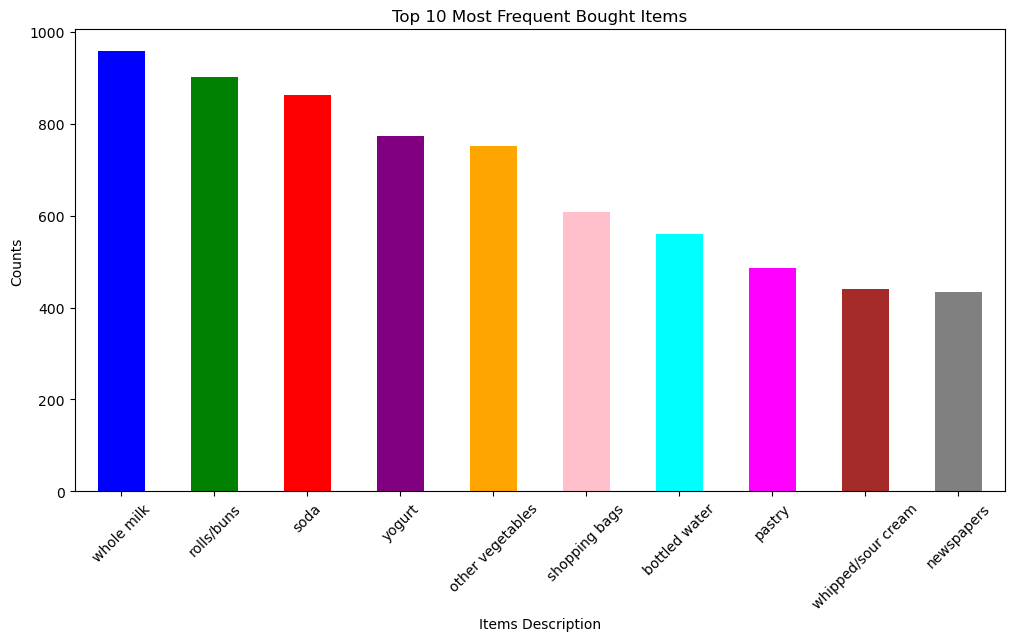

In [46]:
# Get the top 10 most frequent items
top_10_items = items_sales.head(10)

# Define custom bar colors
colors = ['blue', 'green', 'red', 'purple', 'orange', 'pink', 'cyan', 'magenta', 'brown', 'gray']

# Create a bar graph
plt.figure(figsize=(12, 6))
top_10_items.plot(kind='bar', color=colors)
plt.title('Top 10 Most Frequent Bought Items')
plt.xlabel('Items Description')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.show()

#### Based on the result, the most frequest bought items is whole milk with more than 900 items sales.

### Top 10 least frequest bought items

In [45]:
# Define custom bar colors
colors = ['blue', 'green', 'red', 'purple', 'orange', 'pink', 'cyan', 'magenta', 'brown', 'gray']

# Create a bar graph
plt.figure(figsize=(12, 6))
top_10_number_of_members.plot(kind='bar', color=colors)
plt.title('Top 10 Least Frequent Bought Items')
plt.xlabel('Items Description')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.show()

### Top 10 frequest visited members

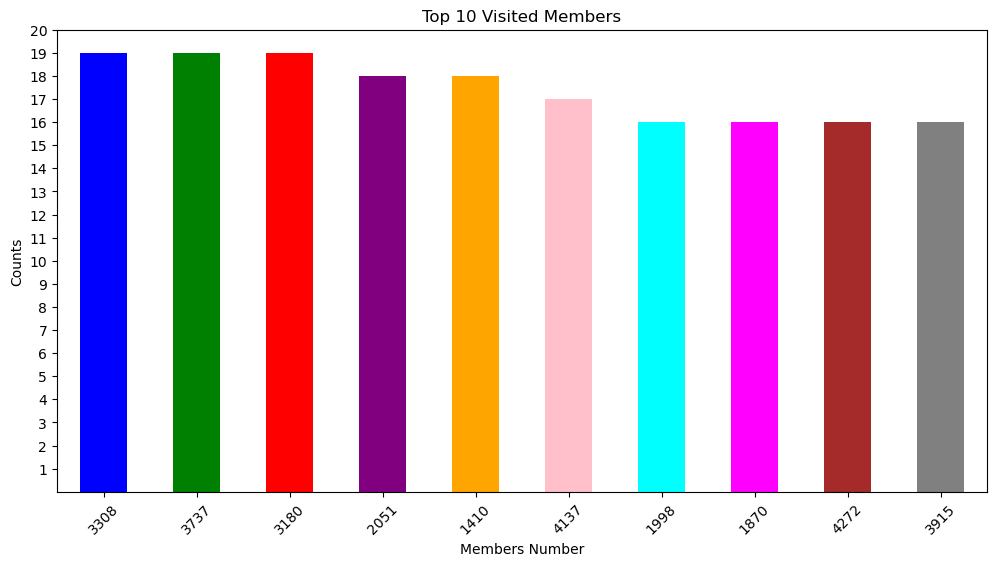

In [53]:
# Create a bar graph
plt.figure(figsize=(12, 6))
top_10_number_of_members.plot(kind='bar', color=colors)
plt.title('Top 10 Visited Members')
plt.xlabel('Members Number')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.yticks(range(1,21))
plt.show()

#### Based on the result, the visited customer with ID "3308', "3737" and "3180" who have visited the store the most number of times (19 times).

### The year is extracted from the date in order to count sales based on the year in this phase.

In [164]:
import pandas as pd
import datetime

# Convert 'Date' column to datetime, handling errors
store_sales['formatted_date'] = pd.to_datetime(store_sales['Date'], dayfirst=True,errors='coerce')
#store_sales['formatted_date'].isnull().value_counts()
#store_sales['formatted_date']
# Extract the year from the formatted date
store_sales['year'] = store_sales['formatted_date'].dt.year.astype('Int64')
# Extract the year from the formatted date
store_sales['month'] = store_sales['formatted_date'].dt.month

### Sales items based on year

Text(0.5, 1.0, 'Sales based on year')

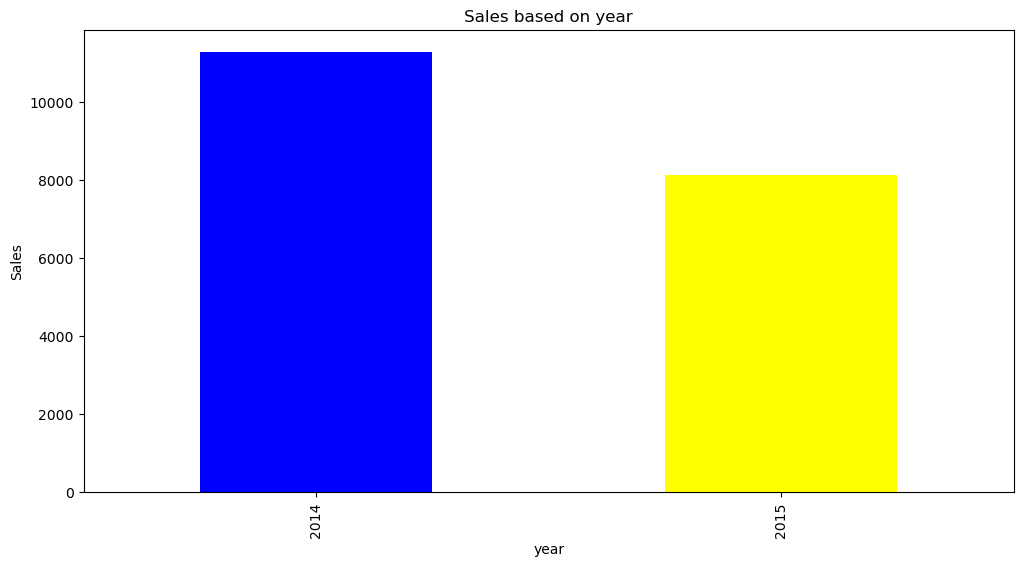

In [77]:
plt.figure(figsize=(12, 6))
store_sales.groupby('year')['itemDescription'].count().plot(kind='bar',color=['blue','yellow'])
plt.ylabel('Sales')
plt.title('Sales based on year')

#### Based on te result above, the sales items on 2014 is more than 2015.

### Top 30 popular items in treemap

In [127]:
# Install squarify library package
!pip install squarify

In [145]:
# Install seaborn library package
!pip install seaborn

In [146]:
import squarify
import seaborn as sns

x = store_sales['itemDescription'].value_counts().head(30).to_frame()

# Set seaborn plot style
sns.set_style(style="whitegrid")
# Plotting a treemap
squarify.plot(sizes=x['itemDescription'], label=x.index, alpha=0.5, color=color).set(title='TreeMap for Top 30 Popular Items')
plt.axis('off')
plt.show()

#### Based on the result above, the larger the size of the rectangle, the higher the sales in transaction sales of  a store.

### Sales items over months in bar graph

In [165]:
# Convert numeric month values to month names
month_names = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 
               7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
store_sales['Month_name'] = store_sales['month'].map(month_names)

# Combine 'year' and 'Month_name' columns
store_sales['Year_Month']=store_sales['year'].apply(str)+' '+store_sales['Month_name'].apply(str)

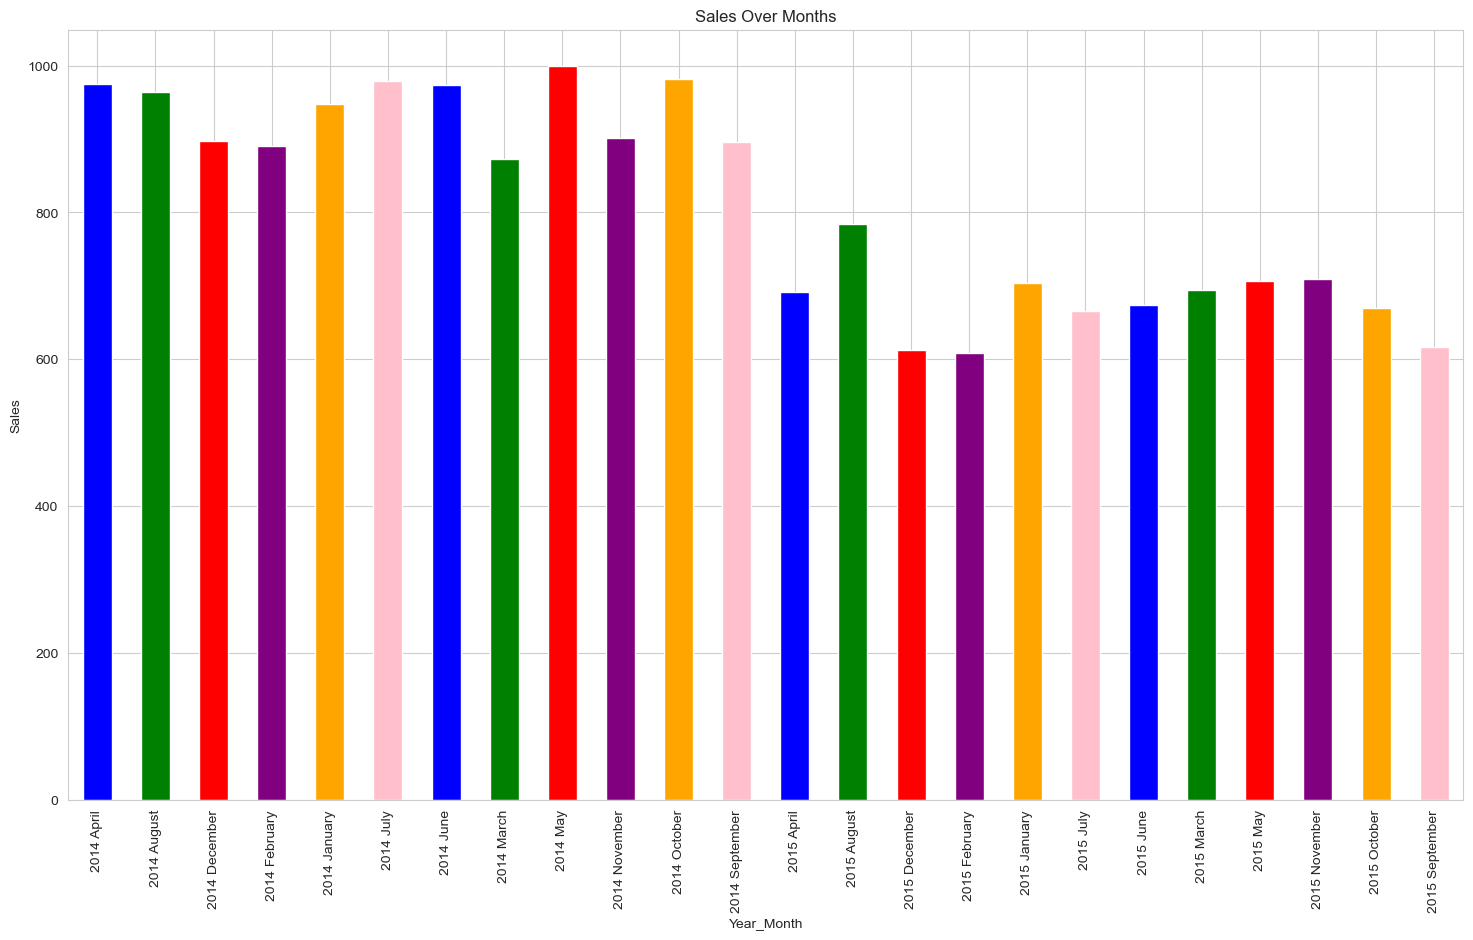

In [167]:
store_sales.groupby('Year_Month')['itemDescription'].count().plot(kind='bar',color=['blue', 'green', 'red', 'purple', 'orange', 'pink'])
plt.ylabel('Sales')
plt.title('Sales Over Months')
plt.show()

#### Based on the result above, the most sales over months is May 2014.

In [80]:
# Group the items by months
months = store_sales.groupby('Month_name')['itemDescription'].count()

### Items sales group by months with the pie chart

In [81]:
# Create a pie chart
pie, ax = plt.subplots(figsize=[10, 6])
explode = [0.05] * len(months)  # Adjusted explode list for each month
plt.pie(x=months, autopct="%.1f%%", explode=explode, labels=months.keys(), pctdistance=0.5)
plt.title("Items sales group by months", fontsize=14)
plt.show()

#### Based on the result above, August has the highest sales.

### Top selling items group by months

In [82]:
cleaned_store_sales = store_sales.pivot_table(index='Month_name',columns='itemDescription', aggfunc={'itemDescription': 'count'}).fillna(0)
cleaned_store_sales['Max'] = cleaned_store_sales.idxmax(axis=1)

cleaned_store_sales

itemDescription                            \
itemDescription Instant food products UHT-milk abrasive cleaner   
Month_name                                                        
April                             3.0     14.0              0.0   
August                            5.0     12.0              3.0   
December                          2.0     14.0              1.0   
February                          3.0      7.0              2.0   
January                           7.0     15.0              2.0   
July                              5.0     18.0              2.0   
June                              2.0     15.0              1.0   
March                             5.0     18.0              3.0   
May                               3.0     16.0              1.0   
November                          1.0     12.0              0.0   
October                           6.0     10.0              1.0   
September                         3.0     14.0              3.0   

                                                                    \
itemDescription artif. sweetener baby cosmetics bags baking powder   
Month_name                                                           
April                        0.0            0.0  0.0          11.0   
August                       1.0            0.0  0.0           7.0   
December                     1.0            0.0  0.0           4.0   
February                     5.0            0.0  1.0           5.0   
January                      2.0            1.0  0.0          11.0   
July                         1.0            0.0  0.0          10.0   
June                         3.0            0.0  0.0          15.0   
March                        2.0            0.0  1.0           4.0   
May                          0.0            0.0  0.0           7.0   
November                     0.0            0.0  0.0          10.0   
October                      3.0            0.0  0.0           5.0   
September                    3.0            0.0  0.0           9.0   

                                               ...                  \
itemDescription bathroom cleaner beef berries  ... vinegar waffles   
Month_name                                     ...                   
April                        0.0  1.0     7.0  ...     1.0    16.0   
August                       1.0  5.0     4.0  ...     3.0    15.0   
December                     1.0  3.0     8.0  ...     3.0    26.0   
February                     0.0  5.0     7.0  ...     1.0    17.0   
January                      0.0  3.0    11.0  ...    11.0    22.0   
July                         3.0  4.0     5.0  ...     2.0    15.0   
June                         1.0  5.0     9.0  ...     4.0    14.0   
March                        0.0  5.0     8.0  ...     4.0    12.0   
May                          0.0  2.0    13.0  ...     4.0    23.0   
November                     1.0  2.0     8.0  ...     5.0    14.0   
October                      3.0  3.0     9.0  ...     2.0    18.0   
September                    2.0  5.0    11.0  ...     2.0    17.0   

                                                                             \
itemDescription whipped/sour cream whisky white bread white wine whole milk   
Month_name                                                                    
April                         34.0    1.0        21.0       11.0       86.0   
August                        21.0    0.0        23.0       12.0      101.0   
December                      40.0    1.0        18.0        6.0       75.0   
February                      34.0    0.0        21.0        7.0       72.0   
January                       44.0    1.0        24.0       11.0       74.0   
July                          32.0    0.0        23.0       13.0       88.0   
June                          50.0    0.0        26.0        5.0       70.0   
March                         30.0    0.0        11.0        7.0       72.0   
May                           44.0    1.0    

In [83]:
# Remove the top level of "iemDescription" from the column index
cleaned_store_sales.columns = cleaned_store_sales.columns.droplevel(0)
cleaned_store_sales

itemDescription  Instant food products  UHT-milk  abrasive cleaner  \
Month_name                                                           
April                              3.0      14.0               0.0   
August                             5.0      12.0               3.0   
December                           2.0      14.0               1.0   
February                           3.0       7.0               2.0   
January                            7.0      15.0               2.0   
July                               5.0      18.0               2.0   
June                               2.0      15.0               1.0   
March                              5.0      18.0               3.0   
May                                3.0      16.0               1.0   
November                           1.0      12.0               0.0   
October                            6.0      10.0               1.0   
September                          3.0      14.0               3.0   

itemDescription  artif. sweetener  baby cosmetics  bags  baking powder  \
Month_name                                                               
April                         0.0             0.0   0.0           11.0   
August                        1.0             0.0   0.0            7.0   
December                      1.0             0.0   0.0            4.0   
February                      5.0             0.0   1.0            5.0   
January                       2.0             1.0   0.0           11.0   
July                          1.0             0.0   0.0           10.0   
June                          3.0             0.0   0.0           15.0   
March                         2.0             0.0   1.0            4.0   
May                           0.0             0.0   0.0            7.0   
November                      0.0             0.0   0.0           10.0   
October                       3.0             0.0   0.0            5.0   
September                     3.0             0.0   0.0            9.0   

itemDescription  bathroom cleaner  beef  berries  ...  vinegar  waffles  \
Month_name                                        ...                     
April                         0.0   1.0      7.0  ...      1.0     16.0   
August                        1.0   5.0      4.0  ...      3.0     15.0   
December                      1.0   3.0      8.0  ...      3.0     26.0   
February                      0.0   5.0      7.0  ...      1.0     17.0   
January                       0.0   3.0     11.0  ...     11.0     22.0   
July                          3.0   4.0      5.0  ...      2.0     15.0   
June                          1.0   5.0      9.0  ...      4.0     14.0   
March                         0.0   5.0      8.0  ...      4.0     12.0   
May                           0.0   2.0     13.0  ...      4.0     23.0   
November                      1.0   2.0      8.0  ...      5.0     14.0   
October                       3.0   3.0      9.0  ...      2.0     18.0   
September                     2.0   5.0     11.0  ...      2.0     17.0   

itemDescription  whipped/sour cream  whisky  white bread  white wine  \
Month_name                                                             
April                          34.0     1.0         21.0        11.0   
August                         21.0     0.0         23.0        12.0   
December                       40.0     1.0         18.0         6.0   
February                       34.0     0.0         21.0         7.0   
January                        44.0     1.0         24.0        11.0   
July                           32.0     0.0         23.0        13.0   
June                           50.0     0.0         26.0         5.0   
March                          30.0     0.0         11.0         7.0   
May                            44.0     1.0         18.0        15.0   
November                       34.0     0.0         29.0         5.0   
October                        25.0     1.0         30.0         7.

#### Based on the result,the 'Max' column identifies the top-selling item for each month. We can analyze which items dominate sales in different months.

### The sales data after completed EDA

In [9]:
store_sales.head()

Member_number        Date   itemDescription formatted_date  year  month  \
0           3562  18-03-2015       salty snack     2015-03-18  2015      3   
1           3145  16-11-2015          cake bar     2015-11-16  2015     11   
2           3595  17-12-2015        whole milk     2015-12-17  2015     12   
3           4934  17-03-2015  other vegetables     2015-03-17  2015      3   
4           3386    3/2/2015            yogurt     2015-02-03  2015      2   

  Month_name     Year_Month  
0      March     2015 March  
1   November  2015 November  
2   December  2015 December  
3      March     2015 March  
4   February  2015 February

### Eliminate unnecessary columns

In [10]:
store_sales.drop('Date', axis = 1, inplace = True)

In [11]:
store_sales.drop(store_sales.iloc[:, 3:7], inplace=True, axis=1)

In [12]:
#Print new dataframe after removing unnecessary columns
store_sales.head()

Member_number   itemDescription formatted_date
0           3562       salty snack     2015-03-18
1           3145          cake bar     2015-11-16
2           3595        whole milk     2015-12-17
3           4934  other vegetables     2015-03-17
4           3386            yogurt     2015-02-03

## Part 2: Preparation of Dataset

In [159]:
# Groups the DataFrame by 'Member_number' and 'formatted_date' and applying a lambda function to create a list of 'itemDescription' for each group
store_sales=store_sales.groupby(['Member_number','formatted_date'])['itemDescription'].apply(lambda x: list(x))

In [14]:
store_sales.head(10)

Member_number  formatted_date
1000           2014-06-24                [pastry, salty snack]
               2015-03-15        [semi-finished bread, yogurt]
               2015-11-25                   [hygiene articles]
1001           2014-02-07             [whole milk, rolls/buns]
               2014-12-12                               [soda]
               2015-01-20                 [whipped/sour cream]
               2015-04-14                        [white bread]
               2015-05-02                               [curd]
1002           2014-02-09                   [other vegetables]
               2014-04-26                         [whole milk]
Name: itemDescription, dtype: object

#### Based on the result above, the store sales data is grouped by the member number and formatted date.

In [15]:
# Display dimension of data
store_sales.shape

(12758,)

#### Based on the output above, there are 12758 rows of data after grouping.

In [16]:
# Converting dataset to list when association mining rule will take place when input as list
sales_records = store_sales.values.tolist()

In [17]:
# Print first 10 rows of data
sales_records[:10]

[['pastry', 'salty snack'],
 ['semi-finished bread', 'yogurt'],
 ['hygiene articles'],
 ['whole milk', 'rolls/buns'],
 ['soda'],
 ['whipped/sour cream'],
 ['white bread'],
 ['curd'],
 ['other vegetables'],
 ['whole milk']]

### Encode the sales records data

In [131]:
# Install mlxtend package
!pip install mlxtend

     ---------------------------------------- 1.4/1.4 MB 822.5 kB/s eta 0:00:00


In [18]:
from mlxtend.preprocessing import TransactionEncoder
x = TransactionEncoder()
x_data = x.fit(sales_records).transform(sales_records)
encoded_df = pd.DataFrame(x_data,columns=x.columns_)
encoded_df

Instant food products  UHT-milk  abrasive cleaner  artif. sweetener  \
0                      False     False             False             False   
1                      False     False             False             False   
2                      False     False             False             False   
3                      False     False             False             False   
4                      False     False             False             False   
...                      ...       ...               ...               ...   
12753                  False     False             False             False   
12754                  False     False             False             False   
12755                  False     False             False             False   
12756                  False     False             False             False   
12757                  False     False             False             False   

       baby cosmetics   bags  baking powder  bathroom cleaner   beef  berries  \
0               False  False          False             False  False    False   
1               False  False          False             False  False    False   
2               False  False          False             False  False    False   
3               False  False          False             False  False    False   
4               False  False          False             False  False    False   
...               ...    ...            ...               ...    ...      ...   
12753           False  False          False             False  False    False   
12754           False  False          False             False  False    False   
12755           False  False          False             False  False    False   
12756           False  False          False             False  False    False   
12757           False  False          False             False  False    False   

       ...  turkey  vinegar  waffles  whipped/sour cream  whisky  white bread  \
0      ...   False    False    False               False   False        False   
1      ...   False    False    False               False   False        False   
2      ...   False    False    False               False   False        False   
3      ...   False    False    False               False   False        False   
4      ...   False    False    False               False   False        False   
...    ...     ...      ...      ...                 ...     ...          ...   
12753  ...   False    False    False               False   False        False   
12754  ...   False    False    False               False   False        False   
12755  ...   False    False    False               False   False        False   
12756  ...   False    False    False               False   False        False   
12757  ...   False    False    False               False   False        False   

       white wine  whole milk  yogurt  zwieback  
0           False       False   False     False  
1           False       False    True     False  
2           False       False   False     False  
3           False        True   False     False  
4           False       False   False     False  
...           ...         ...     ...       ...  
12753       False       False    True     False  
12754       False       False   False     False  
12755       False       False   False     False  
12756       False       False   False     False  
12757       False       False   False     False  

[12758 rows x 164 columns]

#### Based on the result above, the sales records data encoded in the form of lists into a NumPy array.The dataset can be translated into an array format suitable for association using a TransactionEncoder object. The TransactionEncoder learns the unique labels in the dataset using the fit approach, and then transforms the input dataset (a Python list) into a one-hot encoded NumPy boolean array.

#### True indicates that the item exists in the sales records data, while False indicates that the item does not exist in the sales records data.

## Part 3: Methodology

In [21]:
# Install libraries for apriori, association and FPgrowth
from mlxtend.frequent_patterns import apriori, association_rules,fpgrowth

In [22]:
encoded_df.sum()

Instant food products     45
UHT-milk                 165
abrasive cleaner          19
artif. sweetener          21
baby cosmetics             1
                        ... 
white bread              254
white wine               103
whole milk               940
yogurt                   765
zwieback                  29
Length: 164, dtype: int64

### Calculate the support for each item

#### Calculate the number of occurrence of each items in the sales records.

In [24]:
# Product Support / Total Sales Records
# Total transactions is 12758

# Calculate the support for each product
support1 = pd.DataFrame(encoded_df.sum() / encoded_df.shape[0], columns=["Support"]).sort_values("Support", ascending=False)
support1

Support
whole milk             0.073679
rolls/buns             0.068976
soda                   0.066625
yogurt                 0.059962
other vegetables       0.058708
...                         ...
bags                   0.000157
frozen chicken         0.000157
organic sausage        0.000157
baby cosmetics         0.000078
preservation products  0.000078

[164 rows x 1 columns]

#### Based on the result above, the maximum support is 0.074 and the minimum support is 0.000078.

### Apriori algorithm

#### Apriori is a popular algorithm for extracting frequent itemsets with applications in association rule learning. The apriori algorithm has been designed to operate on databases containing transactions, such as purchases by customers of a store. An itemset is considered as “frequent” if it meets a user-specified support threshold. 

### Choose support threshold

#### The support threshold determines the minimum frequency that an itemset must appear in the dataset to be considered frequent. A higher support threshold will result in fewer frequent itemsets being discovered, while a lower threshold will result in more frequent itemsets being discovered.

#### Total sales records = 12758

support = Transaction containing "n" / Total Transaction
#### Suppose that the itemsets were bought 3 times a month and the data in dataset were collected from January 2014 to December 2015(24 months)
This link given https://www.quora.com/How-do-I-pick-appropriate-support-confidence-value-when-doing-basket-analysis-with-Apriori-algorithm?top_ans=14573354 about how do I pick appropriate support & confidence value when doing basket analysis with Apriori algorithm?

### Assume that minimum support threshold = (3*24)/12758=0.006

In [99]:
encoded_df1 = apriori(encoded_df,min_support=0.006,use_colnames=True)
encoded_df1

support              itemsets
0   0.012933            (UHT-milk)
1   0.007681       (baking powder)
2   0.007838             (berries)
3   0.008152           (beverages)
4   0.027277        (bottled beer)
..       ...                   ...
58  0.034175  (whipped/sour cream)
59  0.019909         (white bread)
60  0.008073          (white wine)
61  0.073679          (whole milk)
62  0.059962              (yogurt)

[63 rows x 2 columns]

#### Sort the itemsets based on support in descending order

In [100]:
encoded_df1.sort_values(by="support",ascending=False)

support               itemsets
61  0.073679           (whole milk)
45  0.068976           (rolls/buns)
51  0.066625                 (soda)
62  0.059962               (yogurt)
37  0.058708     (other vegetables)
..       ...                    ...
48  0.007525  (semi-finished bread)
15  0.007054         (citrus fruit)
11  0.006584          (canned fish)
38  0.006506                (pasta)
42  0.006114           (pot plants)

[63 rows x 2 columns]

### Length of the itemsets

In [101]:
# Calculate the length of each itemset
encoded_df1['itemset_lengths']= encoded_df1['itemsets'].apply(lambda x: len(x))

# Print the length of each itemset in dataframe
encoded_df1

support              itemsets  itemset_lengths
0   0.012933            (UHT-milk)                1
1   0.007681       (baking powder)                1
2   0.007838             (berries)                1
3   0.008152           (beverages)                1
4   0.027277        (bottled beer)                1
..       ...                   ...              ...
58  0.034175  (whipped/sour cream)                1
59  0.019909         (white bread)                1
60  0.008073          (white wine)                1
61  0.073679          (whole milk)                1
62  0.059962              (yogurt)                1

[63 rows x 3 columns]

### Length of the itemsets equal or more than 2

In [102]:
encoded_df1[(encoded_df1['itemset_lengths']>=2 )]

Empty DataFrame
Columns: [support, itemsets, itemset_lengths]
Index: []

#### In theory, setting the minimum support to a lower value is advisable to obtain frequent itemsets that include a minimum of two items in tuple. Otherwise, the result may be empty.  Based on the result, the result return none since the larger value of support threshold. Therefore, we need to try a smaller value of support threshold.

### Assume that minimum support threshold = (2*24)/12758=0.004

In [103]:
encoded_df1 = apriori(encoded_df,min_support=0.004,use_colnames=True)
encoded_df1

support              itemsets
0   0.012933            (UHT-milk)
1   0.007681       (baking powder)
2   0.007838             (berries)
3   0.008152           (beverages)
4   0.027277        (bottled beer)
..       ...                   ...
75  0.034175  (whipped/sour cream)
76  0.019909         (white bread)
77  0.008073          (white wine)
78  0.073679          (whole milk)
79  0.059962              (yogurt)

[80 rows x 2 columns]

In [104]:
# Sort the itemsets based on support in descending order
encoded_df1.sort_values(by="support",ascending=False)

support                     itemsets
78  0.073679                 (whole milk)
59  0.068976                 (rolls/buns)
67  0.066625                       (soda)
79  0.059962                     (yogurt)
49  0.058708           (other vegetables)
..       ...                          ...
71  0.004468              (spread cheese)
10  0.004311                    (candles)
25  0.004154               (dish cleaner)
50  0.004154  (packaged fruit/vegetables)
42  0.004154                 (mayonnaise)

[80 rows x 2 columns]

In [105]:
# Calculate the length of each itemset
encoded_df1['itemset_lengths']= encoded_df1['itemsets'].apply(lambda x: len(x))

# Print the length of each itemset in dataframe
encoded_df1

support              itemsets  itemset_lengths
0   0.012933            (UHT-milk)                1
1   0.007681       (baking powder)                1
2   0.007838             (berries)                1
3   0.008152           (beverages)                1
4   0.027277        (bottled beer)                1
..       ...                   ...              ...
75  0.034175  (whipped/sour cream)                1
76  0.019909         (white bread)                1
77  0.008073          (white wine)                1
78  0.073679          (whole milk)                1
79  0.059962              (yogurt)                1

[80 rows x 3 columns]

In [106]:
# Check the length of the itemsets equal or more than 2
encoded_df1[(encoded_df1['itemset_lengths']>=2 )]

Empty DataFrame
Columns: [support, itemsets, itemset_lengths]
Index: []

#### Based on the result, the result return none since the larger value of support threshold. Therefore, we need to try a smaller value of support threshold.

### Assume that minimum support threshold = (1*24)/12758=0.002

In [107]:
encoded_df1 = apriori(encoded_df,min_support=0.002,use_colnames=True)
encoded_df1

support                  itemsets
0    0.003527   (Instant food products)
1    0.012933                (UHT-milk)
2    0.007681           (baking powder)
3    0.003370                    (beef)
4    0.007838                 (berries)
..        ...                       ...
113  0.002351        (rolls/buns, soda)
114  0.002587  (rolls/buns, whole milk)
115  0.002351     (shopping bags, soda)
116  0.002508        (whole milk, soda)
117  0.002587            (yogurt, soda)

[118 rows x 2 columns]

In [108]:
# Sort the itemsets based on support in descending order
encoded_df1.sort_values(by="support",ascending=False)

support                    itemsets
108  0.073679                (whole milk)
81   0.068976                (rolls/buns)
90   0.066625                      (soda)
109  0.059962                    (yogurt)
66   0.058708          (other vegetables)
..        ...                         ...
18   0.002273                   (cereals)
94   0.002195            (sparkling wine)
54   0.002195            (kitchen towels)
36   0.002038  (female sanitary products)
53   0.002038                       (jam)

[118 rows x 2 columns]

In [109]:
# Calculate the length of each itemset
encoded_df1['itemset_lengths']= encoded_df1['itemsets'].apply(lambda x: len(x))

# Print the length of each itemset in dataframe
encoded_df1

support                  itemsets  itemset_lengths
0    0.003527   (Instant food products)                1
1    0.012933                (UHT-milk)                1
2    0.007681           (baking powder)                1
3    0.003370                    (beef)                1
4    0.007838                 (berries)                1
..        ...                       ...              ...
113  0.002351        (rolls/buns, soda)                2
114  0.002587  (rolls/buns, whole milk)                2
115  0.002351     (shopping bags, soda)                2
116  0.002508        (whole milk, soda)                2
117  0.002587            (yogurt, soda)                2

[118 rows x 3 columns]

In [110]:
# Check the length of the itemsets equal or more than 2
encoded_df1[(encoded_df1['itemset_lengths']>=2 )]

support                        itemsets  itemset_lengths
111  0.002430  (other vegetables, whole milk)                2
112  0.002273     (rolls/buns, shopping bags)                2
113  0.002351              (rolls/buns, soda)                2
114  0.002587        (rolls/buns, whole milk)                2
115  0.002351           (shopping bags, soda)                2
116  0.002508              (whole milk, soda)                2
117  0.002587                  (yogurt, soda)                2

#### Among the results obtained, seven itemsets meet the minimum support threshold of 0.002, and these itemsets specifically have a length of 2. This requirement ensures that each itemset contains at least two items in a tuple; otherwise, the result will be empty.

### Choose confidence threshold

#### The confidence threshold determines the minimum level of certainty required for an association rule to be considered interesting. A higher confidence threshold will result in fewer association rules being discovered, while a lower threshold will result in more association rules being discovered.

#### Total sales records = 12758

confidence = Transaction containing both item A & B / Transaction containing item A

"When the support values for each item range from 0.000078 to 0.074, it is assumed that a 3% confidence threshold is utilized in this analysis."

#### confidence minimum threshold = 3/100=0.03

In [111]:
apriori_rules = association_rules(encoded_df1, metric="confidence", min_threshold=0.03)
apriori_rules

antecedents         consequents  antecedent support  \
0   (other vegetables)        (whole milk)            0.058708   
1         (whole milk)  (other vegetables)            0.073679   
2         (rolls/buns)     (shopping bags)            0.068976   
3      (shopping bags)        (rolls/buns)            0.046402   
4         (rolls/buns)              (soda)            0.068976   
5               (soda)        (rolls/buns)            0.066625   
6         (rolls/buns)        (whole milk)            0.068976   
7         (whole milk)        (rolls/buns)            0.073679   
8      (shopping bags)              (soda)            0.046402   
9               (soda)     (shopping bags)            0.066625   
10        (whole milk)              (soda)            0.073679   
11              (soda)        (whole milk)            0.066625   
12            (yogurt)              (soda)            0.059962   
13              (soda)            (yogurt)            0.066625   

    consequent support   support  confidence      lift  leverage  conviction  \
0             0.073679  0.002430    0.041389  0.561739 -0.001896    0.966315   
1             0.058708  0.002430    0.032979  0.561739 -0.001896    0.973393   
2             0.046402  0.002273    0.032955  0.710193 -0.000928    0.986094   
3             0.068976  0.002273    0.048986  0.710193 -0.000928    0.978980   
4             0.066625  0.002351    0.034091  0.511684 -0.002244    0.966318   
5             0.068976  0.002351    0.035294  0.511684 -0.002244    0.965086   
6             0.073679  0.002587    0.037500  0.508963 -0.002496    0.962411   
7             0.068976  0.002587    0.035106  0.508963 -0.002496    0.964898   
8             0.066625  0.002351    0.050676  0.760612 -0.000740    0.983199   
9             0.046402  0.002351    0.035294  0.760612 -0.000740    0.988485   
10            0.066625  0.002508    0.034043  0.510959 -0.002401    0.966269   
11            0.073679  0.002508    0.037647  0.510959 -0.002401    0.962558   
12            0.066625  0.002587    0.043137  0.647465 -0.001408    0.975454   
13            0.059962  0.002587    0.038824  0.647465 -0.001408    0.978007   

    zhangs_metric  
0       -0.453207  
1       -0.457183  
2       -0.304735  
3       -0.299683  
4       -0.506181  
5       -0.505550  
6       -0.508903  
7       -0.510169  
8       -0.248146  
9       -0.252167  
10      -0.508173  
11      -0.506276  
12      -0.366775  
13      -0.368428

### FP-growth algorithm

#### FP-Growth is an frequent pattern mining algorithm that does not require candidate generation. FP-Growth is an algorithm for extracting frequent itemsets with applications in association rule learning that emerged as a popular alternative to the established Apriori algorithm. In general, the algorithm has been designed to operate on databases containing transactions, such as purchases by customers of a store. An itemset is considered as "frequent" if it meets a user-specified support threshold.

#### The FP-growth algorithm, like the Apriori algorithm, relies on predefined minimum support and minimum confidence thresholds.

#### minimum support threshold = 0.002 & confidence minimum threshold = 0.03

In [55]:
frequent_itemsets_fp=fpgrowth(encoded_df, min_support=0.002, use_colnames=True)
fp_rules = association_rules(frequent_itemsets_fp, metric="confidence", min_threshold=0.03)
fp_rules

antecedents         consequents  antecedent support  \
0             (yogurt)              (soda)            0.059962   
1               (soda)            (yogurt)            0.066625   
2         (rolls/buns)        (whole milk)            0.068976   
3         (whole milk)        (rolls/buns)            0.073679   
4         (whole milk)              (soda)            0.073679   
5               (soda)        (whole milk)            0.066625   
6         (rolls/buns)              (soda)            0.068976   
7               (soda)        (rolls/buns)            0.066625   
8   (other vegetables)        (whole milk)            0.058708   
9         (whole milk)  (other vegetables)            0.073679   
10     (shopping bags)              (soda)            0.046402   
11              (soda)     (shopping bags)            0.066625   
12        (rolls/buns)     (shopping bags)            0.068976   
13     (shopping bags)        (rolls/buns)            0.046402   

    consequent support   support  confidence      lift  leverage  conviction  \
0             0.066625  0.002587    0.043137  0.647465 -0.001408    0.975454   
1             0.059962  0.002587    0.038824  0.647465 -0.001408    0.978007   
2             0.073679  0.002587    0.037500  0.508963 -0.002496    0.962411   
3             0.068976  0.002587    0.035106  0.508963 -0.002496    0.964898   
4             0.066625  0.002508    0.034043  0.510959 -0.002401    0.966269   
5             0.073679  0.002508    0.037647  0.510959 -0.002401    0.962558   
6             0.066625  0.002351    0.034091  0.511684 -0.002244    0.966318   
7             0.068976  0.002351    0.035294  0.511684 -0.002244    0.965086   
8             0.073679  0.002430    0.041389  0.561739 -0.001896    0.966315   
9             0.058708  0.002430    0.032979  0.561739 -0.001896    0.973393   
10            0.066625  0.002351    0.050676  0.760612 -0.000740    0.983199   
11            0.046402  0.002351    0.035294  0.760612 -0.000740    0.988485   
12            0.046402  0.002273    0.032955  0.710193 -0.000928    0.986094   
13            0.068976  0.002273    0.048986  0.710193 -0.000928    0.978980   

    zhangs_metric  
0       -0.366775  
1       -0.368428  
2       -0.508903  
3       -0.510169  
4       -0.508173  
5       -0.506276  
6       -0.506181  
7       -0.505550  
8       -0.453207  
9       -0.457183  
10      -0.248146  
11      -0.252167  
12      -0.304735  
13      -0.299683

#### The results obtained from both the Apriori algorithm and the FP-growth algorithm on this dataset are identical although the sequence of result is different in FP-growth.

### Calculate the execution time for Apriori and FP-growth algoritms

In [ ]:
import time
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import fpgrowth

# Measure Apriori execution time
start_time_apriori = time.time()
apriori_result = apriori(encoded_df, min_support=0.002, use_colnames=True)
end_time_apriori = time.time()
execution_time_apriori = end_time_apriori - start_time_apriori

# Measure FP-growth execution time
start_time_fpgrowth = time.time()
fpgrowth_result = fpgrowth(encoded_df, min_support=0.002, use_colnames=True)
end_time_fpgrowth = time.time()
execution_time_fpgrowth = end_time_fpgrowth - start_time_fpgrowth

# Print the execution times
print("Apriori Execution Time: {:.4f} seconds".format(execution_time_apriori))
print("FP-growth Execution Time: {:.4f} seconds".format(execution_time_fpgrowth))

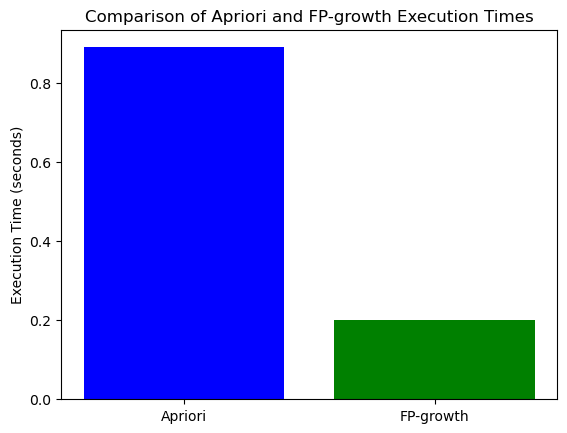

In [120]:
# Plot the execution times
algorithms = ['Apriori', 'FP-growth']
execution_times = [execution_time_apriori, execution_time_fpgrowth]

plt.bar(algorithms, execution_times, color=['blue', 'green'])
plt.ylabel('Execution Time (seconds)')
plt.title('Comparison of Apriori and FP-growth Execution Times')
plt.show()

#### Based on the result above, FP-growth algorithm consumes less execution time compared to Apriori algorithm.

## Part 4: Results and Implementation

### Apriori Algorithm Result

In [121]:
apriori_rules

antecedents         consequents  antecedent support  \
0   (other vegetables)        (whole milk)            0.058708   
1         (whole milk)  (other vegetables)            0.073679   
2         (rolls/buns)     (shopping bags)            0.068976   
3      (shopping bags)        (rolls/buns)            0.046402   
4         (rolls/buns)              (soda)            0.068976   
5               (soda)        (rolls/buns)            0.066625   
6         (rolls/buns)        (whole milk)            0.068976   
7         (whole milk)        (rolls/buns)            0.073679   
8      (shopping bags)              (soda)            0.046402   
9               (soda)     (shopping bags)            0.066625   
10        (whole milk)              (soda)            0.073679   
11              (soda)        (whole milk)            0.066625   
12            (yogurt)              (soda)            0.059962   
13              (soda)            (yogurt)            0.066625   

    consequent support   support  confidence      lift  leverage  conviction  \
0             0.073679  0.002430    0.041389  0.561739 -0.001896    0.966315   
1             0.058708  0.002430    0.032979  0.561739 -0.001896    0.973393   
2             0.046402  0.002273    0.032955  0.710193 -0.000928    0.986094   
3             0.068976  0.002273    0.048986  0.710193 -0.000928    0.978980   
4             0.066625  0.002351    0.034091  0.511684 -0.002244    0.966318   
5             0.068976  0.002351    0.035294  0.511684 -0.002244    0.965086   
6             0.073679  0.002587    0.037500  0.508963 -0.002496    0.962411   
7             0.068976  0.002587    0.035106  0.508963 -0.002496    0.964898   
8             0.066625  0.002351    0.050676  0.760612 -0.000740    0.983199   
9             0.046402  0.002351    0.035294  0.760612 -0.000740    0.988485   
10            0.066625  0.002508    0.034043  0.510959 -0.002401    0.966269   
11            0.073679  0.002508    0.037647  0.510959 -0.002401    0.962558   
12            0.066625  0.002587    0.043137  0.647465 -0.001408    0.975454   
13            0.059962  0.002587    0.038824  0.647465 -0.001408    0.978007   

    zhangs_metric  
0       -0.453207  
1       -0.457183  
2       -0.304735  
3       -0.299683  
4       -0.506181  
5       -0.505550  
6       -0.508903  
7       -0.510169  
8       -0.248146  
9       -0.252167  
10      -0.508173  
11      -0.506276  
12      -0.366775  
13      -0.368428

### FP-growth Algorithm Result

In [122]:
fp_rules

antecedents         consequents  antecedent support  \
0             (yogurt)              (soda)            0.059962   
1               (soda)            (yogurt)            0.066625   
2         (rolls/buns)        (whole milk)            0.068976   
3         (whole milk)        (rolls/buns)            0.073679   
4         (whole milk)              (soda)            0.073679   
5               (soda)        (whole milk)            0.066625   
6         (rolls/buns)              (soda)            0.068976   
7               (soda)        (rolls/buns)            0.066625   
8   (other vegetables)        (whole milk)            0.058708   
9         (whole milk)  (other vegetables)            0.073679   
10     (shopping bags)              (soda)            0.046402   
11              (soda)     (shopping bags)            0.066625   
12        (rolls/buns)     (shopping bags)            0.068976   
13     (shopping bags)        (rolls/buns)            0.046402   

    consequent support   support  confidence      lift  leverage  conviction  \
0             0.066625  0.002587    0.043137  0.647465 -0.001408    0.975454   
1             0.059962  0.002587    0.038824  0.647465 -0.001408    0.978007   
2             0.073679  0.002587    0.037500  0.508963 -0.002496    0.962411   
3             0.068976  0.002587    0.035106  0.508963 -0.002496    0.964898   
4             0.066625  0.002508    0.034043  0.510959 -0.002401    0.966269   
5             0.073679  0.002508    0.037647  0.510959 -0.002401    0.962558   
6             0.066625  0.002351    0.034091  0.511684 -0.002244    0.966318   
7             0.068976  0.002351    0.035294  0.511684 -0.002244    0.965086   
8             0.073679  0.002430    0.041389  0.561739 -0.001896    0.966315   
9             0.058708  0.002430    0.032979  0.561739 -0.001896    0.973393   
10            0.066625  0.002351    0.050676  0.760612 -0.000740    0.983199   
11            0.046402  0.002351    0.035294  0.760612 -0.000740    0.988485   
12            0.046402  0.002273    0.032955  0.710193 -0.000928    0.986094   
13            0.068976  0.002273    0.048986  0.710193 -0.000928    0.978980   

    zhangs_metric  
0       -0.366775  
1       -0.368428  
2       -0.508903  
3       -0.510169  
4       -0.508173  
5       -0.506276  
6       -0.506181  
7       -0.505550  
8       -0.453207  
9       -0.457183  
10      -0.248146  
11      -0.252167  
12      -0.304735  
13      -0.299683

### Interpretation of result

#### In the results above containing association rules resulting from association rule mining, statistical knowledge is leveraged to explore meaningful relationships between items in transactional data. The association rules present insights into item co-occurrences, and metrics such as confidence, lift, and support quantify the strength and significance of these associations. Confidence represents the conditional probability of a consequent given the antecedent, while lift measures the strength of association by comparing the observed support with that expected if the items were independent. Support indicates the frequency of the rule occurrence in the dataset. The presented results provide a statistical basis for understanding patterns and dependencies within the transactions, offering valuable information for decision-making and business strategy.